In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

In [5]:
# loading data
churn_df = pd.read_csv('./Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

In [9]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Manipulation

The 'Churn' column will be our target variable here

In [13]:
# dropping customer id column, not needed as feature for analysis
churn_df = churn_df.drop(['customerID'],axis=1)

In [15]:
# converting these columns from object to numeric type
churn_df['TotalCharges'] = pd.to_numeric(churn_df.TotalCharges, errors='coerce')
churn_df['MonthlyCharges'] = pd.to_numeric(churn_df.MonthlyCharges, errors='coerce')
churn_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
churn_df[np.isnan(churn_df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We see that for customers with TotalCharges null the Tenure is 0

In [20]:
churn_df[churn_df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Missing values is Tenure column is same as what we have above

These are probably fresh customers, we can delete these rows from our data as it's only 11 customers

In [23]:
churn_df.drop(labels=churn_df[churn_df['tenure'] == 0].index, axis=0, inplace=True)

In [25]:
churn_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Only senior citizen column has 0,1 and all other columns have No,Yes

Updating to fix that

In [28]:
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].map({0: "No",1: "Yes"})
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
churn_df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [32]:
churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Data Visualization

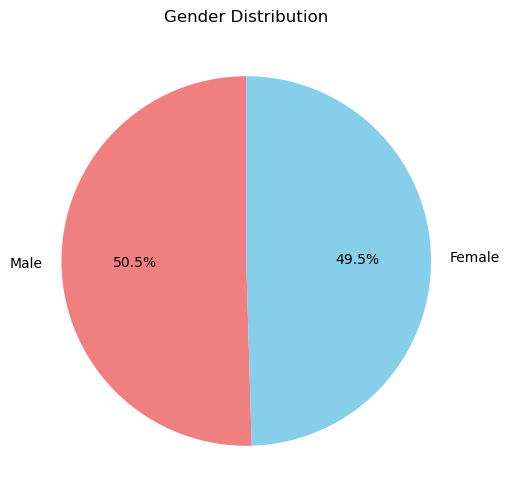

In [35]:
churn_df['gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue'],
    figsize=(6, 6)
)
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

50.5% of our customers are male and 49.5% are female

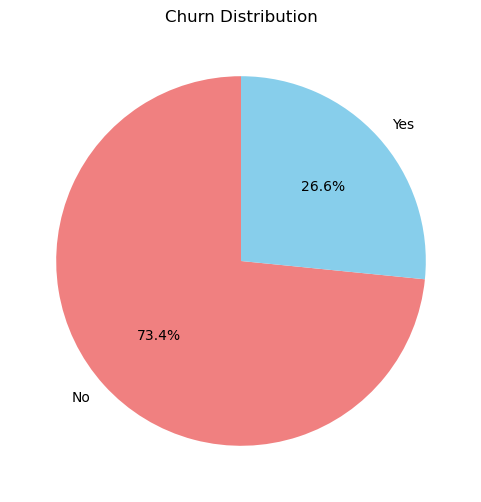

In [38]:
churn_df['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue'],
    figsize=(6, 6)
)
plt.ylabel('')
plt.title('Churn Distribution')
plt.show()

26.6% customers churned

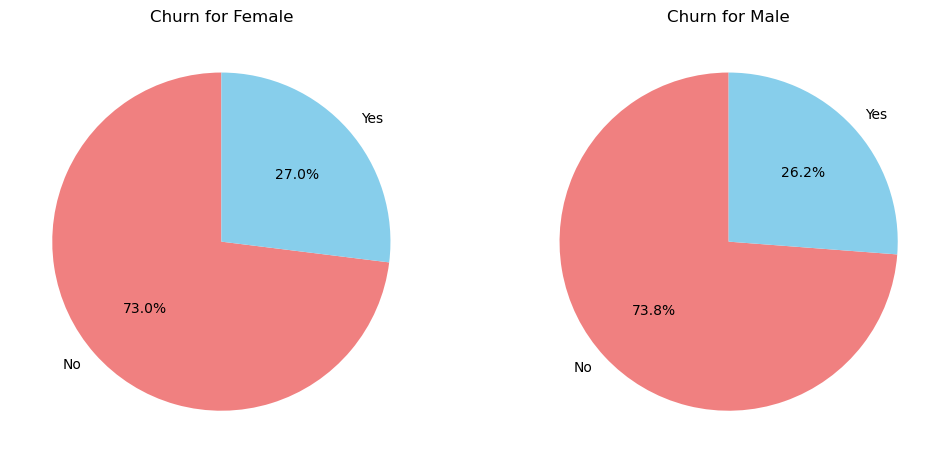

In [41]:
churn_counts = churn_df.groupby(['gender', 'Churn']).size().reset_index(name='count')

# Plot one pie per gender
genders = churn_counts['gender'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(12, 6))

for ax, gender in zip(axes, genders):
    data = churn_counts[churn_counts['gender'] == gender]
    ax.pie(
        data['count'],
        labels=data['Churn'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'skyblue']
    )
    ax.set_title(f'Churn for {gender}')

plt.show()

The difference in churn based on genders is negligible

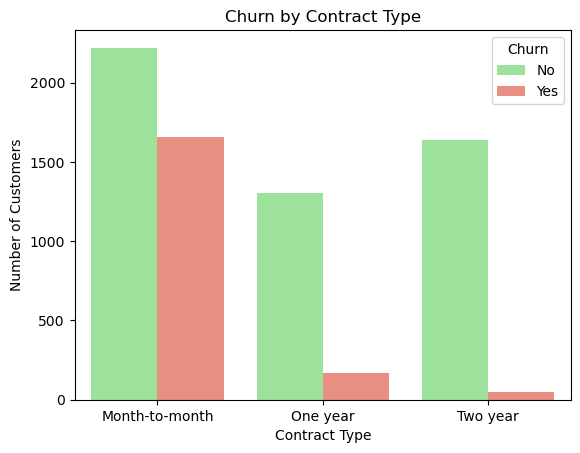

In [44]:
sns.countplot(
    data=churn_df,
    x='Contract',
    hue='Churn',
    palette={'Yes': 'salmon', 'No': 'lightgreen'}
)

plt.title('Churn by Contract Type')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.show()

About 75% of customers on Month-to-Month Contract opted to move out/churn

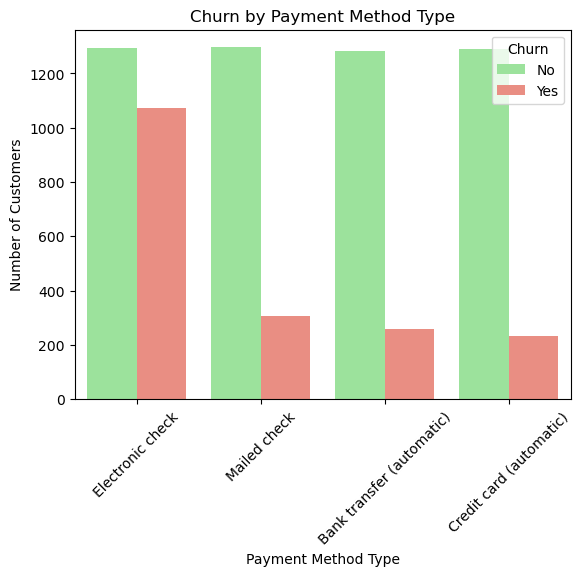

In [47]:
sns.countplot(
    data=churn_df,
    x='PaymentMethod',
    hue='Churn',
    palette={'Yes': 'salmon', 'No': 'lightgreen'}
)

plt.title('Churn by Payment Method Type')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Method Type')
plt.xticks(rotation=45)
plt.show()

Main customers who churned had Electronic Check as Payment Method

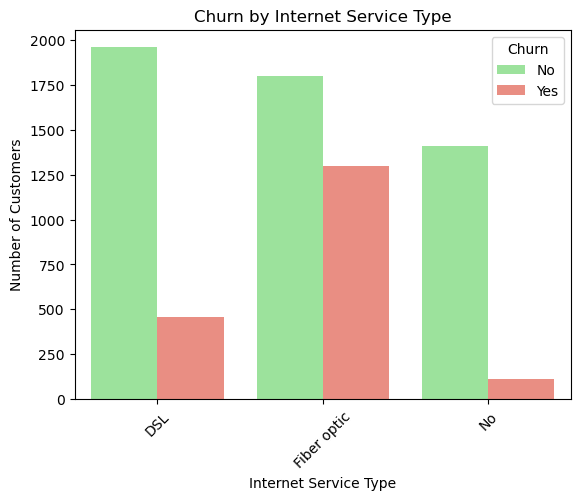

In [50]:
sns.countplot(
    data=churn_df,
    x='InternetService',
    hue='Churn',
    palette={'Yes': 'salmon', 'No': 'lightgreen'}
)

plt.title('Churn by Internet Service Type')
plt.ylabel('Number of Customers')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=45)
plt.show()

Customers choosing fiber optic as the internet service type have a high churn rate

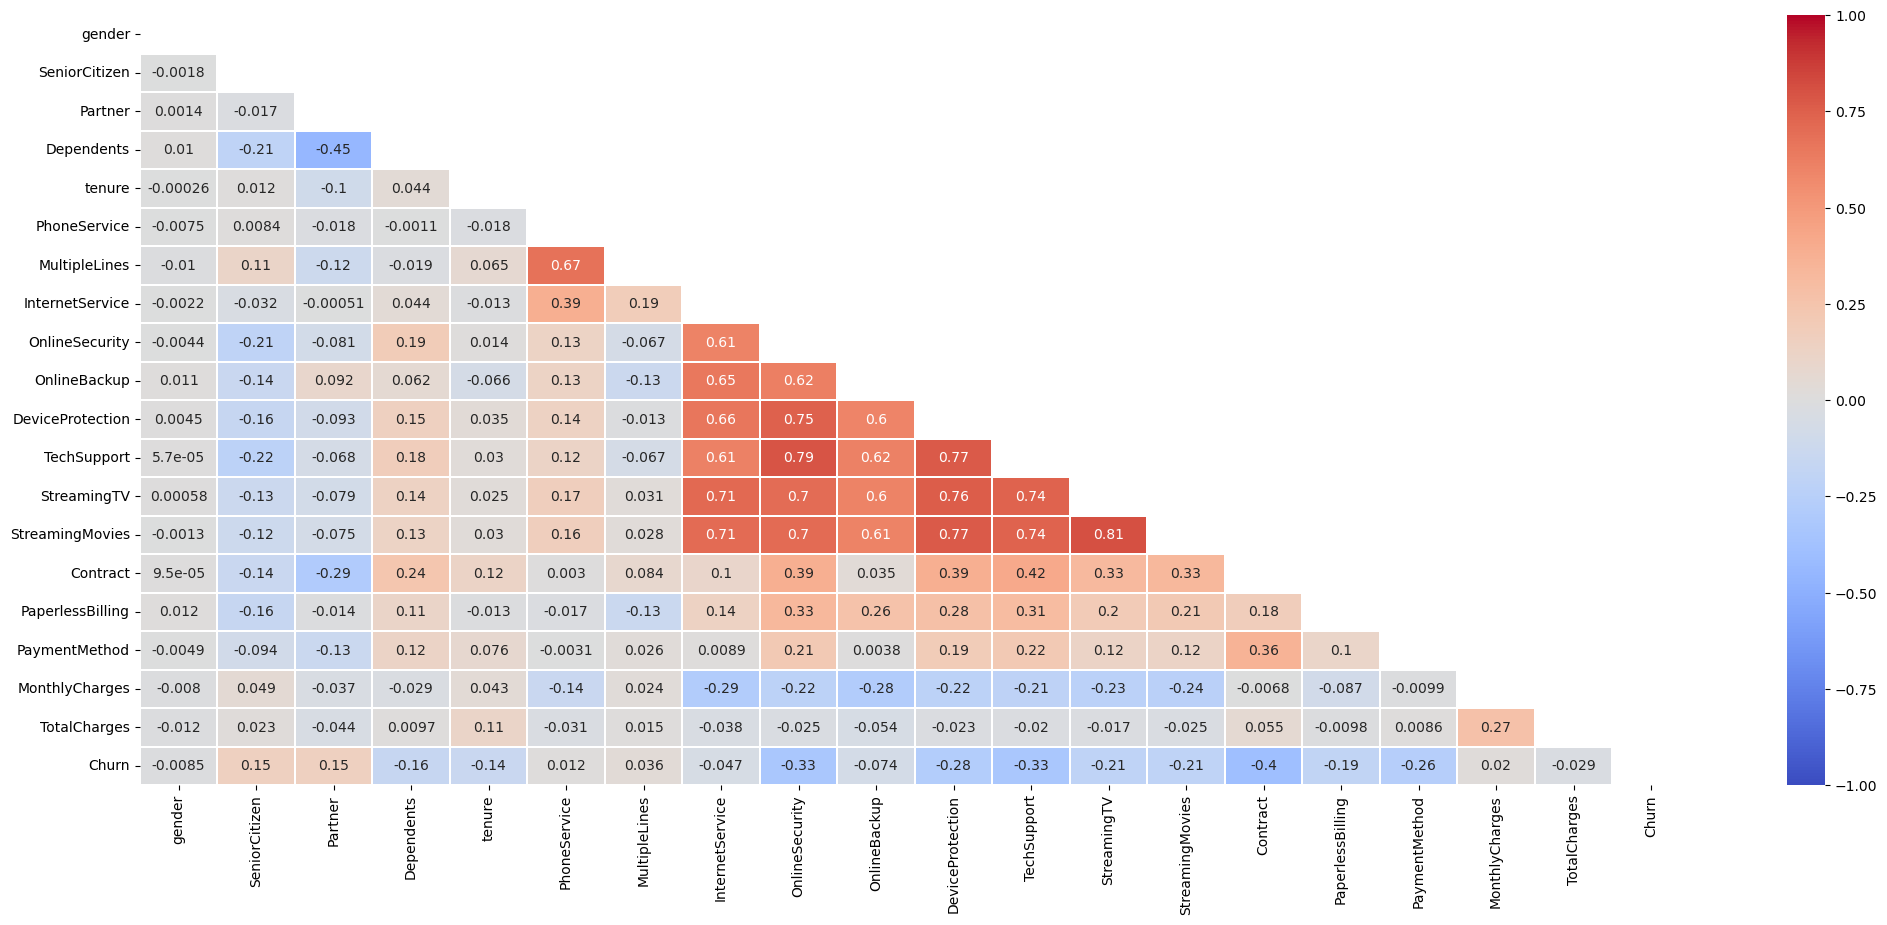

In [53]:
plt.figure(figsize=(25, 10))

corr = churn_df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Churn seems to have a slightly strong negative correlation with the features - Contract, TechSupport, OnlineSecurity

- Contract -> Longer-term contracts reduce churn
- tenure -> Customers who’ve been with the company longer churn less
- OnlineSecurity -> Having online security correlates with less churn
- TechSupport -> Having tech support correlates with less churn

### Data Preprocessing

In [57]:
# Label encode the target
churn_df['Churn'] = LabelEncoder().fit_transform(churn_df['Churn'])

In [59]:
# standardizing numeric columns to have mean = 0 and std = 1
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# columns that need one-hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']
# columns that need label encoding
cat_cols_le = list(set(churn_df.columns)- set(numeric_cols) - set(cat_cols_ohe))

In [61]:
# label encoding the binary columns
for col in cat_cols_le:
    churn_df[col] = LabelEncoder().fit_transform(churn_df[col])

churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,1,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [63]:
scaler = StandardScaler()
churn_df[numeric_cols] = scaler.fit_transform(churn_df[numeric_cols])

In [65]:
# using pd.get_dummies for one-hot encoding
churn_df = pd.get_dummies(churn_df, columns=cat_cols_ohe, drop_first=True)
# drop_first: If True, drops the first dummy variable created for each categorical column
# this is used to prevent multicollinearity in regression models where one category can be inferred from the others

In [67]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.280248,0,1,0,2,0,...,-1.161694,-0.994194,0,False,True,False,False,False,False,False
1,1,0,0,0,0.064303,1,0,2,0,2,...,-0.260878,-0.173740,0,False,False,True,True,False,False,False
2,1,0,0,0,-1.239504,1,0,2,2,0,...,-0.363923,-0.959649,1,False,False,True,False,False,False,False
3,1,0,0,0,0.512486,0,1,2,0,2,...,-0.747850,-0.195248,0,False,False,False,True,False,False,False
4,0,0,0,0,-1.239504,1,0,0,0,0,...,0.196178,-0.940457,1,False,True,False,False,False,True,False


In [69]:
# creating a feature matrix X by dropping the target column
X = churn_df.drop(columns = ['Churn'])
# setting y to be the target labels (.values to convert series to a numpy array)
y = churn_df['Churn'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, stratify=y)
# stratify=y allows train_test_split to have the same target class distribution between train and test

### Model Predictions and Evaluations

#### K-Nearest Neighbors (KNN) model

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.7818


In [77]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



The model accuracy is 78.2%

- Precision: When the model predicts No Churn (0) its right 83% of the time. When it predicts Churn (1) its right 60% of the time.
- Recall: Out of all actual No Churn customers 88% were correctly predicted. Out of all actual Churn customers only 52% were caught.
- F1-score: Balance of precision & recall, shows that No Churn is predicted much better than Churn.

#### Random Forest Classifier

In [81]:
rf = RandomForestClassifier(n_estimators=400, random_state=42, max_leaf_nodes=40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.8138


In [82]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1033
           1       0.72      0.49      0.58       374

    accuracy                           0.81      1407
   macro avg       0.78      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



The model accuracy is 81.4%

- Precision: When the model predicts No Churn (0) its right 83% of the time. When it predicts Churn (1) its right 72% of the time.
- Recall: Out of all actual No Churn customers 93% were correctly predicted. Out of all actual Churn customers only 49% were caught.
- F1-score: Balance of precision & recall, shows that No Churn is predicted much better than Churn.

Random Forest improved precision for churners (72% vs 60% in KNN)

Random Forest is generally stronger here because it handles mixed features & non-linear patterns better than KNN

#### Logistic Regression

In [87]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
# class_weight helps handle class imbalance
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.7520


In [89]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



The model accuracy is 75.2%

class_weight='balanced' trades some accuracy to find more actual churns, recall for churn goes up (80% vs 57%)

In churn prediction catching churners is more valuable than just predicting the majority class. 

It’s more costly to miss a churner than to wrongly predict someone might churn. (Low precision)

So higher churn recall is more important than pure accuracy.

#### XG Boost Classifier

In [93]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
# scale_pos_weight boosts the positive class

In [95]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.7619


In [97]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1033
           1       0.53      0.82      0.65       374

    accuracy                           0.76      1407
   macro avg       0.73      0.78      0.73      1407
weighted avg       0.82      0.76      0.77      1407



The model accuracy is 75.2%

Compared to Random Forest: RF had higher accuracy (81%) but lower churn recall (49%). So XGB finds way more churners than RF did at the cost of some false positives.

Higher recall for churn is usually more valuable than tiny boosts in accuracy because its more useful to flag a customer who might churn than to miss them.